In [17]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [30]:
def generate_time_series(batch_size,n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5 * np.sin( (time-offsets1) * (freq1 * 10 + 10))
    series += 0.5 * np.sin( (time-offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size,n_steps) -0.5) 
    return series[...,np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000,n_steps+1)
X_train, y_train = series[:7000,:n_steps], series[:7000,-1]
X_valid, y_valid = series[7000:9000,:n_steps], series[7000:9000,-1]
X_test, y_test = series[9000:,:n_steps], series[9000:,-1]

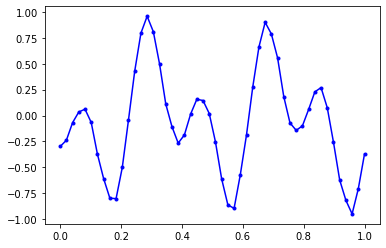

In [21]:
plt.plot(np.linspace(0,1,n_steps),X_test[2,:],"b-",marker=".")
plt.show()

In [41]:
y_pred = X_test[:,-1]
np.mean(keras.losses.mean_squared_error(y_test,y_pred))

0.056596145

## Simple linear model

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[n_steps,1]),
    keras.layers.Dense(1,input_shape=[None,1])
])
model.compile(optimizer="Adam",loss="mse")
model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
 23/219 [==>...........................] - ETA: 0s - loss: 0.7349 

2022-02-02 14:19:21.849238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 1s 3ms/step - loss: 0.3877 - val_loss: 0.1763
Epoch 2/20
 44/219 [=====>........................] - ETA: 0s - loss: 0.1657

2022-02-02 14:19:22.505237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 1s 3ms/step - loss: 0.1124 - val_loss: 0.0685
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0522 - val_loss: 0.0387
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0329 - val_loss: 0.0279
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0246 - val_loss: 0.0218
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0177
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 0.0144
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 11/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 12/

In [43]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_test,y_pred))

2022-02-02 14:19:35.994225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.0063776015

## Simple RNN

In [38]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1,input_shape=[None,1])
])
model.compile(optimizer="Adam",loss="mse")

In [39]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20


2022-02-02 13:23:24.494564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - ETA: 0s - loss: 0.3036

2022-02-02 13:25:58.155808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 160s 728ms/step - loss: 0.3036 - val_loss: 0.2342
Epoch 2/20
219/219 [==============================] - 160s 732ms/step - loss: 0.1962 - val_loss: 0.1653
Epoch 3/20
219/219 [==============================] - 161s 737ms/step - loss: 0.1510 - val_loss: 0.1345
Epoch 4/20
219/219 [==============================] - 161s 734ms/step - loss: 0.1257 - val_loss: 0.1136
Epoch 5/20
219/219 [==============================] - 163s 744ms/step - loss: 0.1071 - val_loss: 0.0975
Epoch 6/20
219/219 [==============================] - 162s 739ms/step - loss: 0.0928 - val_loss: 0.0851
Epoch 7/20
219/219 [==============================] - 164s 748ms/step - loss: 0.0815 - val_loss: 0.0755
Epoch 8/20
219/219 [==============================] - 163s 744ms/step - loss: 0.0726 - val_loss: 0.0675
Epoch 9/20
219/219 [==============================] - 167s 762ms/step - loss: 0.0652 - val_loss: 0.0610
Epoch 10/20
219/219 [==============================] - 165s 751ms/step - lo

In [40]:
y_pred = model.predict(X_test)
np.mean(keras.losses.mean_squared_error(y_test,y_pred))

2022-02-02 14:18:43.519895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.028289482

In [44]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(optimizer="Adam",loss="mse")
model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20


2022-02-02 14:19:53.553981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - ETA: 0s - loss: 0.0447

2022-02-02 14:30:56.336456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 683s 3s/step - loss: 0.0447 - val_loss: 0.0099
Epoch 2/20
 67/219 [========>.....................] - ETA: 7:50 - loss: 0.0091

KeyboardInterrupt: 

In [46]:
model = keras.models.Sequential([
    keras.layers.GRU(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.GRU(20,return_sequences=True),
    keras.layers.GRU(1)
])
model.compile(optimizer="Adam",loss="mse")
model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20


2022-02-02 15:02:55.856618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:02:55.977536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:02:56.162316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:02:56.226757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:02:56.419866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:02:57.581263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:02:58.625518: I tensorflow/core/grappler/optimizers/cust

219/219 [==============================] - ETA: 0s - loss: 0.1803

2022-02-02 15:03:08.228218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:03:08.267767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:03:08.325714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 15:03:08.387871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 14s 48ms/step - loss: 0.1803 - val_loss: 0.1279
Epoch 2/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1236 - val_loss: 0.1219
Epoch 3/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1214 - val_loss: 0.1257
Epoch 4/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1233 - val_loss: 0.1297
Epoch 5/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1279 - val_loss: 0.1245
Epoch 6/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1304 - val_loss: 0.1306
Epoch 7/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1405 - val_loss: 0.1312
Epoch 8/20
219/219 [==============================] - 10s 43ms/step - loss: 0.1356 - val_loss: 0.1282
Epoch 9/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1306 - val_loss: 0.1311
Epoch 10/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1396 - val_loss: 0.139

In [48]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
219/219 [==============================] - 10s 45ms/step - loss: 0.1738 - val_loss: 0.1644
Epoch 2/20
219/219 [==============================] - 10s 44ms/step - loss: 0.1473 - val_loss: 0.1394
Epoch 3/20
219/219 [==============================] - 10s 45ms/step - loss: 0.1375 - val_loss: 0.1345
Epoch 4/20
219/219 [==============================] - 10s 45ms/step - loss: 0.1305 - val_loss: 0.1299
Epoch 5/20
219/219 [==============================] - 10s 44ms/step - loss: 0.1151 - val_loss: 0.1059
Epoch 6/20
219/219 [==============================] - 10s 44ms/step - loss: 0.1061 - val_loss: 0.1003
Epoch 7/20
219/219 [==============================] - 10s 45ms/step - loss: 0.1005 - val_loss: 0.0976
Epoch 8/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0982 - val_loss: 0.0989
Epoch 9/20
219/219 [==============================] - 10s 45ms/step - loss: 0.0990 - val_loss: 0.0998
Epoch 10/20
219/219 [==============================] - 10s 45ms/step - loss: 0.101